In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [4]:
url = 'https://raw.github.com/Naufalfdh19/tripadvisor_hotel_reviews/main/tripadvisor_hotel_reviews.csv'
df = pd.read_csv(url)
df.tail(10)

,Review,Rating
99,great people great location took wife birthday...,5
100,great location stayed stopover australia 2 5 y...,4
101,great location reasonable hotel overall happy ...,4
102,"beautiful i.m, pei designed hotel i.m pei desi...",5
103,"excellent, read reviews sure booked room north...",5
104,"fairmont hotel singapore splendid, stayed fair...",5
105,great hotel stayed hotel night route perth chr...,4
106,great hotel centre stayed 5 nights room overlo...,4
107,great location great value great hotel husband...,5
108,lovely hotel great location stayed vacation to...,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  109 non-null    object
 1   Rating  109 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


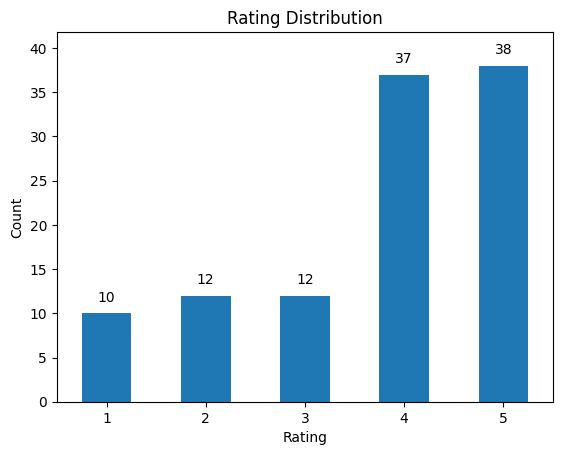

In [34]:
# rating distribution

rating_counts = df['Rating'].value_counts().sort_index()
ax = rating_counts.plot.bar()

for i, count in enumerate(rating_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

ax.set_xlabel("Rating")
ax.set_ylabel("Count")
ax.set_title("Rating Distribution")
ax.set_ylim(0, max(rating_counts) * 1.10)
plt.xticks(rotation=0)
plt.show()

In [8]:
# make a review in lowercase to avoid the same word treat differently

df['Review'] = df['Review'].apply(lambda x: x.lower())

# you can use "df['Review'].str.lower()" line with the same result with above line

# Remove Stopwords

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
en_stopwords = stopwords.words('english')
en_stopwords.remove("not")

In [11]:
print(en_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she

In [12]:
def remove_stopwords(x):
  return ' '.join([word for word in x.split() if word not in (en_stopwords)])

In [13]:
df['Review'] = df['Review'].apply(lambda x: remove_stopwords(x))

# Remove Punctuation

In [14]:
import re

In [15]:
def remove_punctuation(x):
  pattern = r"[^\w\s]"
  return re.sub(pattern, "", x)

In [16]:
df['Review'] = df['Review'].apply(lambda x: remove_punctuation(x))

# Tokenization

In [17]:
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [18]:
df['Review'].apply(lambda x: sent_tokenize(x))

,Review
0,[nice hotel expensive parking got good deal st...
1,[ok nothing special charge diamond member hilt...
2,[nice rooms not 4 experience hotel monaco seat...
3,[unique great stay wonderful time hotel monaco...
4,[great stay great stay went seahawk game aweso...
...,...
104,[fairmont hotel singapore splendid stayed fair...
105,[great hotel stayed hotel night route perth ch...
106,[great hotel centre stayed 5 nights room overl...
107,[great location great value great hotel husban...


In [19]:
df['Review'] = df['Review'].apply(lambda x: word_tokenize(x))

# Lemmatization

In [20]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [21]:
lemmatizer = WordNetLemmatizer()

In [22]:
def lemmatized_words(x):
  return [lemmatizer.lemmatize(word) for word in x]

def combine_words(x):
  return ' '.join([word for word in x])

In [23]:
df['Review'] = df['Review'].apply(lambda x: combine_words(lemmatized_words(x)))

# Explatory Data Analysis

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
def word_count(data, n_min, n_max):
  vectorizer = CountVectorizer(ngram_range=(n_min, n_max))
  X = vectorizer.fit_transform(data)

  ngram_counts = pd.DataFrame(
      X.toarray(),
      columns=vectorizer.get_feature_names_out()
  )

  ngram_totals = ngram_counts.sum().sort_values(ascending=False)

  return ngram_totals


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'great location'),
  Text(1, 0, 'great view'),
  Text(2, 0, 'staff friendly'),
  Text(3, 0, 'great hotel'),
  Text(4, 0, 'staff helpful'),
  Text(5, 0, 'pike market'),
  Text(6, 0, 'inn market'),
  Text(7, 0, 'room clean'),
  Text(8, 0, 'location great'),
  Text(9, 0, 'place market')])

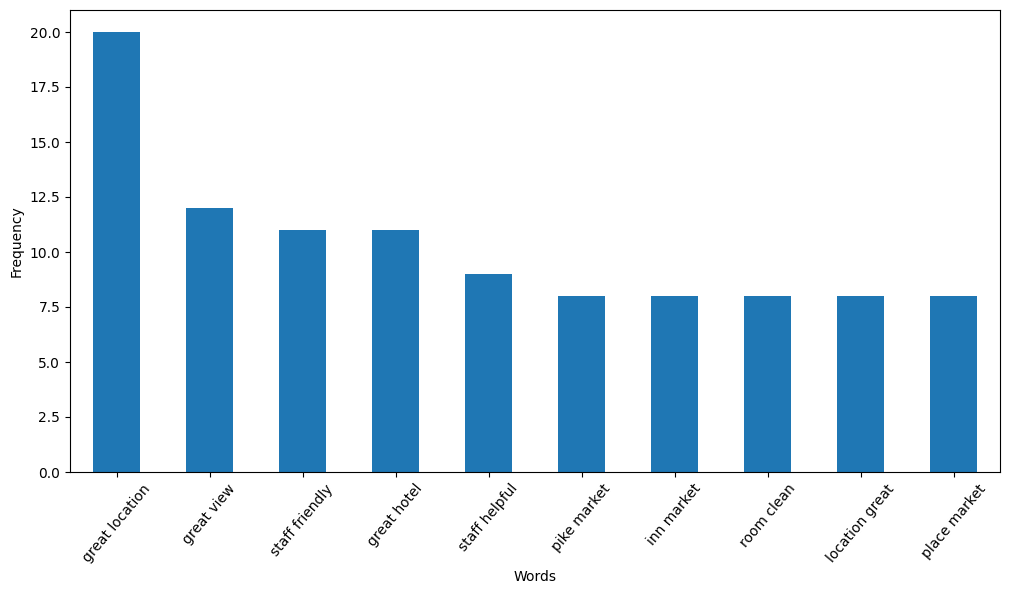

In [64]:
data = df['Review'][df['Rating'] >= 4]

remove_words = ['space needle', 'convention center', 'king bed', 'crowne plaza', 'hotel monaco', 'pike place', 'walking distance']
pattern = '|'.join(remove_words)

ngram_totals = word_count(data, 2, 3)
ngram_totals = ngram_totals[~ngram_totals.index.str.contains(pattern)]

top_10_words = ngram_totals.head(10)

top_10_words.plot.bar(figsize=(12,6))
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=50)

Causes of High Ratings (4 to 5)

**Great Location**

Guests appreciate the hotel's strategic location, which provides easy access to nearby attractions, restaurants, and public transportation.

**Beautiful Views**

Many reviews highlight the scenic views from the hotel rooms or common areas, adding to a pleasant and memorable stay.

**Friendly Staff**

The staff is often described as welcoming, approachable, and polite, creating a warm and comfortable atmosphere for guests.

**Excellent Hotel Facilities**

Reviewers frequently mention the overall quality of the hotel—including cleanliness, amenities, and design—as exceeding expectations.

**Helpful Service**

The staff is praised for going above and beyond to assist guests, whether through providing local information, solving problems quickly, or fulfilling special requests.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'consider smoking room'),
  Text(1, 0, 'staff quite rude'),
  Text(2, 0, 'room higher floor'),
  Text(3, 0, 'room not serviced'),
  Text(4, 0, 'pool basement quaint'),
  Text(5, 0, 'polite cheery helpful'),
  Text(6, 0, 'policy reserve room'),
  Text(7, 0, 'poor cleanliness check'),
  Text(8, 0, 'point crowne room'),
  Text(9, 0, 'pmam lounge cleaned')])

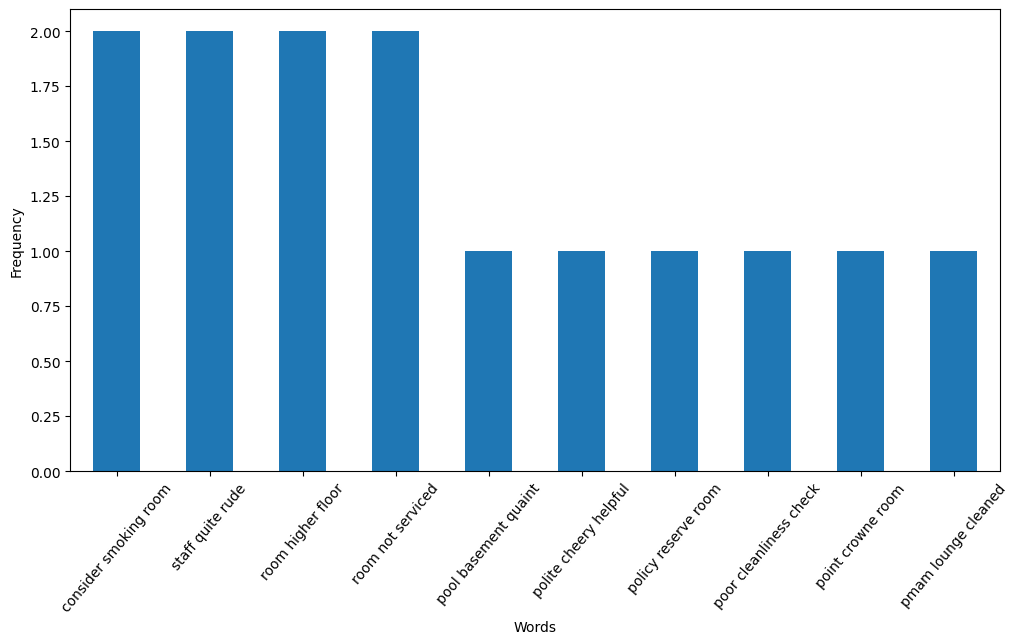

In [62]:
data = df['Review'][df['Rating'] < 4]

remove_words = ['inn queen anne', 'place stay seattle', 'stay crowne plaza']
pattern = '|'.join(remove_words)

ngram_totals = word_count(data, 3, 3)
ngram_totals = ngram_totals[~ngram_totals.index.str.contains(pattern)]

top_10_words = ngram_totals.head(10)

top_10_words.plot.bar(figsize=(12,6))
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=50)

Causes of Low Ratings (1 to 3 stars):

**Lack of Smoking Room**

The hotel does not provide a designated smoking area or smoking room. This is inconvenient for guests who smoke, and may also cause discomfort for non-smokers who are exposed to smoke in undesignated areas. This issue likely contributed to negative reviews from both groups.

**Rude Staff**

Several guests mentioned unpleasant interactions with staff, describing them as unfriendly or unhelpful. Poor customer service significantly impacts the overall guest experience and contributes to low satisfaction.

**Room Issues**

- Unserviced Rooms: Some guests reported that their rooms were not cleaned or maintained properly during their stay.

- Inconsistent Room Quality: Guests staying on higher floors felt that their rooms were of lower quality compared to those on lower floors, leading to dissatisfaction.

